In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
df=pd.read_csv(r"superheated_vapor_properties.csv")

In [149]:
df.head()

,Pressure,Property,Liq_Sat,Vap_Sat,75,100,125,150,175,200,...,425,450,475,500,525,550,575,600,625,650
0,1.0,V,1.000,129200.0000,160640.0000,172180.0000,183720.0000,195270.0000,206810.0000,218350.0000,...,NaN,333730.00,NaN,356810.0000,NaN,379880.0000,NaN,402960.0000,NaN,426040.0000
1,1.0,U,29.334,2385.2000,2480.8000,2516.4000,2552.3000,2588.5000,2624.9000,2661.7000,...,NaN,3049.90,NaN,3132.4000,NaN,3216.7000,NaN,3302.6000,NaN,3390.3000
2,1.0,H,29.335,2514.4000,2641.5000,2688.6000,2736.0000,2783.7000,2831.7000,2880.1000,...,NaN,3383.60,NaN,3489.2000,NaN,3596.5000,NaN,3705.6000,NaN,3816.4000
3,1.0,S,0.106,8.9767,9.3828,9.5136,9.6365,9.7527,9.8629,9.9679,...,NaN,10.82,NaN,10.9612,NaN,11.0957,NaN,11.2243,NaN,11.3476
4,10.0,V,1.010,14670.0000,16030.0000,17190.0000,18350.0000,19510.0000,20660.0000,21820.0000,...,NaN,33370.00,NaN,35670.0000,NaN,37980.0000,NaN,40290.0000,NaN,42600.0000


In [150]:
p1=[]
p2=[]
p3=[]
for i in range(0,df.shape[0],4):
    if(df["Pressure"][i]<300):
        p1.append(df["Vap_Sat"][i])
    if(df["Pressure"][i]>=300 and df["Pressure"][i]<=1500 ):
        p2.append(df["Vap_Sat"][i])
    if(df["Pressure"][i]>1500):
        p3.append(df["Vap_Sat"][i])
        

In [151]:
df.shape

(544, 37)

In [152]:
len(p1)

16

In [153]:
len(p2)

39

In [154]:
len(p3)

81

In [155]:
p1_1=[df["Pressure"][i] for i in range(0,544,4) if df["Pressure"][i]<300]
p2_2=[df["Pressure"][i] for i in range(0,544,4) if (df["Pressure"][i]>=300 and df["Pressure"][i]<=1500)]
p3_3=[df["Pressure"][i] for i in range(0,544,4) if df["Pressure"][i]>1500]

In [156]:
print(len(p1_1),len(p2_2),len(p3_3))

16 39 81


 dataset 1 : pressure <300

In [157]:
x1=np.array(p1_1).reshape(-1,1)

In [158]:
y1=np.array(p1).reshape(-1,1)

In [159]:
print(x1.shape,y1.shape)

(16, 1) (16, 1)


In [160]:
u=x1.mean(axis=0)
std=x1.std(axis=0)
x1=(x1-u)/std


C:\Users\actor\AppData\Local\Temp\ipykernel_26360\72812141.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


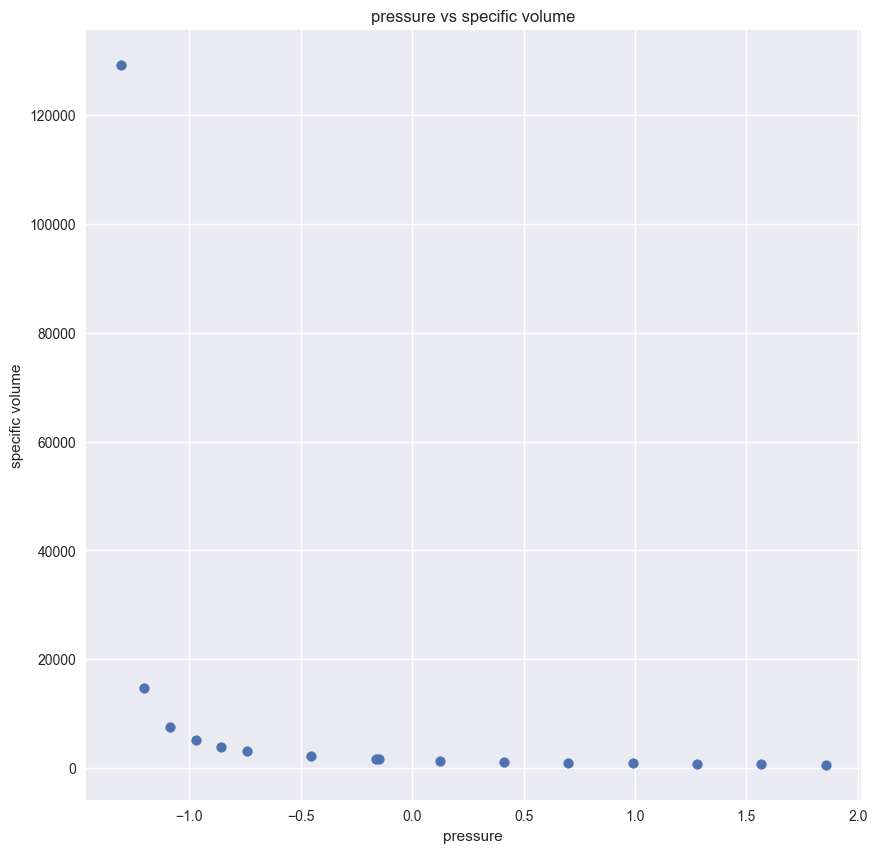

In [161]:
plt.style.use("seaborn")
plt.figure(figsize=(10,10))
plt.scatter(x1,y1)
plt.title("pressure vs specific volume")
plt.xlabel("pressure")
plt.ylabel("specific volume")
plt.legend()
plt.show()

In [162]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x1,y1)

LinearRegression()

In [163]:
y_pred=model.predict(x1)
y_pred.shape

(16, 1)

In [164]:
y_pred

array([[ 27462.70127647],
       [ 26154.7003303 ],
       [ 24701.36594568],
       [ 23248.03156105],
       [ 21794.69717642],
       [ 20341.36279179],
       [ 16708.02683023],
       [ 13074.69086866],
       [ 12882.1240627 ],
       [  9441.35490709],
       [  5808.01894552],
       [  2174.68298395],
       [ -1458.65297761],
       [ -5091.98893918],
       [ -8725.32490075],
       [-12358.66086232]])

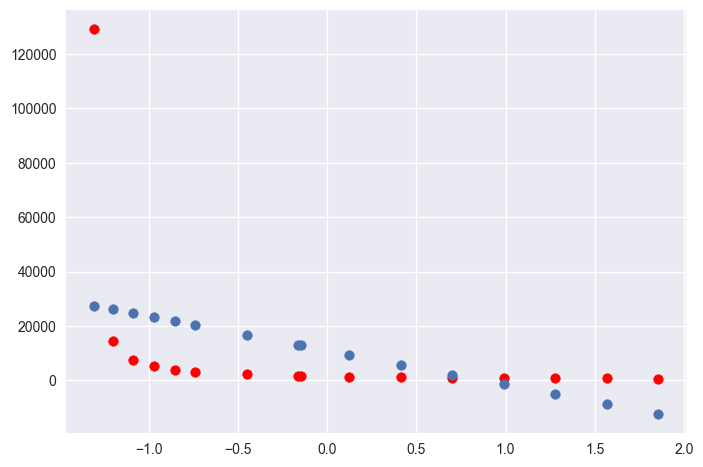

In [165]:
plt.scatter(x1,y1,c="red")
plt.scatter(x1,y_pred)

In [166]:
from sklearn.metrics import r2_score
r=r2_score(y1,y_pred)

In [167]:
print(r,model.coef_,model.intercept_)

0.16815590648253187 [[-12596.62249278]] [11009.820625]


In [168]:
def hypothesis(x,theta):
    y_= x*theta[1]+theta[0]
    return y_
def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        #x=X[i]
        y_=hypothesis(X[i],theta)
        grad[0]+=y_-Y[i]
        grad[1]+=(y_-Y[i])*X[i]
    return grad/m

def gradient_descent(X,Y,max=30,lr=0.1):
    theta=np.zeros((2,))
    error_list=[]
    
    for i in range(max):
        # update theta
        grad=gradient(X,Y,theta)
        theta[0]=theta[0]-lr*grad[0]
       
        
        theta[1]=theta[1]-lr*grad[1]
        #print(theta[0],theta[1])
        #print(grad)
        #e=error(X,Y,theta)
        #error_list.append(e)
    return theta
        

In [169]:
theta=gradient_descent(x1,y1)

In [170]:
theta # this is the slope and the intercept

array([ 10543.1015763 , -12062.63707495])

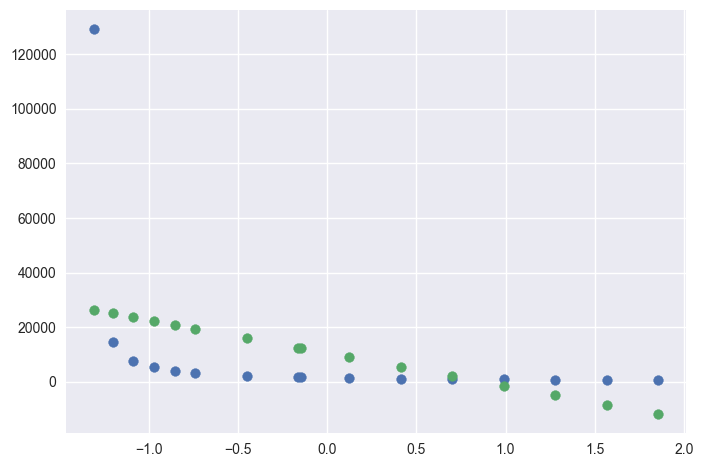

In [171]:
y_pred0=hypothesis(x1,theta)
plt.scatter(x1,y1)
plt.scatter(x1,y_pred0)

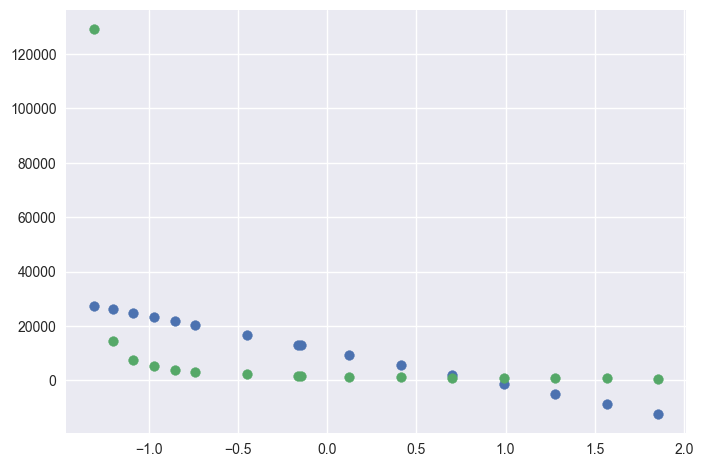

In [172]:
def hypothesis(m,c,x):
    return m*x+c
def loss1(y_,y):
    return np.mean((y_-y)**2)
def gradient_b(m,c,x,y):
    y_= hypothesis(m,c,x)
    #print(y_.shape)
    return (y_-y).sum(axis=0)/(y_.shape[0])
def gradient_m(m,c,x,y):
    y_=hypothesis(m,c,x)
    return ((y_-y)*x).sum(axis=0)/(y_.shape[0])

def linear_regression(x,y,max_iter=5000,lr=0.1):
    # there is only one variant theta so take it as m1
    loss=[]
    m1=np.random.randn(1)
    b1=np.random.randn(1)
    m=x.shape[0]
    for i in range(max_iter):
        m1=m1-gradient_m(m1,b1,x,y)*lr
        b1=b1-gradient_b(m1,b1,x,y)*lr
        #print(m1,b1)
        
        y1=hypothesis(m1,b1,x)
        l=loss1(y1,y)
        
        loss.append(l)
    

    return (m1,b1,loss)
(m1,b1,loss)=linear_regression(x1,y1)
y_pred=hypothesis(m1,b1,x1)
plt.scatter(x1,y_pred)
plt.scatter(x1,y1)

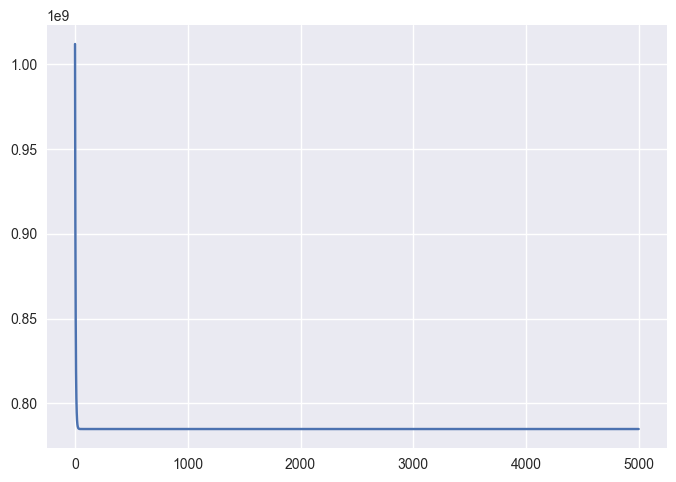

In [173]:
plt.plot(loss)

In [174]:
print(r2_score(y1,y_pred),theta)

0.16815590648253198 [ 10543.1015763  -12062.63707495]


# datasets 2 : pressure>300 and pressure<1500
        

In [175]:
x2=np.array(p2_2).reshape(-1,1)
y2=np.array(p2).reshape(-1,1)

In [176]:
print(x2.shape,y2.shape)

(39, 1) (39, 1)


## Normalizing dataset

In [177]:
u=x2.mean(axis=0)
std=x2.std(axis=0)
x2=(x2-u)/std


In [178]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x2,y2)

LinearRegression()

In [179]:
y_pred=model.predict(x2)
y_pred.shape

(39, 1)

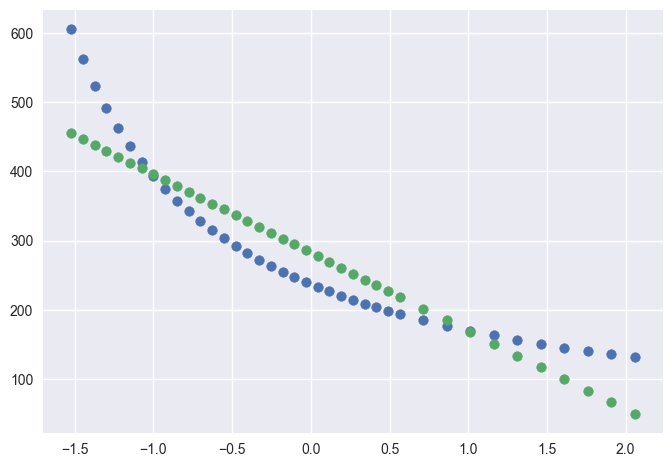

In [180]:
plt.scatter(x2,y2)
plt.scatter(x2,y_pred)

In [181]:
r1=r2_score(y2,y_pred)
print(r1,model.coef_,model.intercept_)

0.8335613390956468 [[-113.14919758]] [282.70820513]


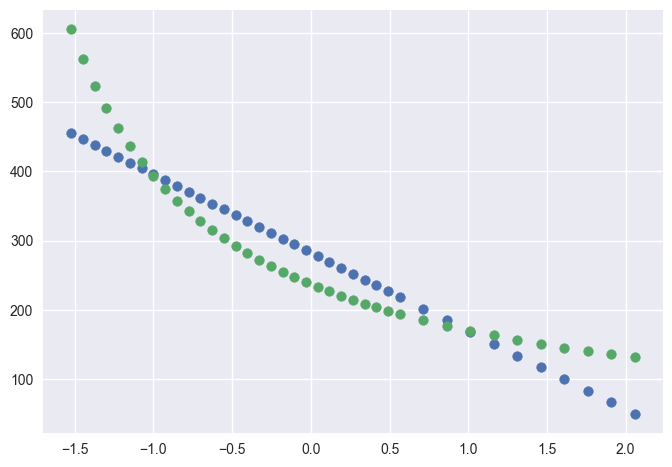

In [182]:
(m1,b1,loss)=linear_regression(x2,y2)
y_pred=hypothesis(m1,b1,x2)
#plt.scatter(x2,y2,c='red')
plt.scatter(x2,y_pred)
plt.scatter(x2,y2)

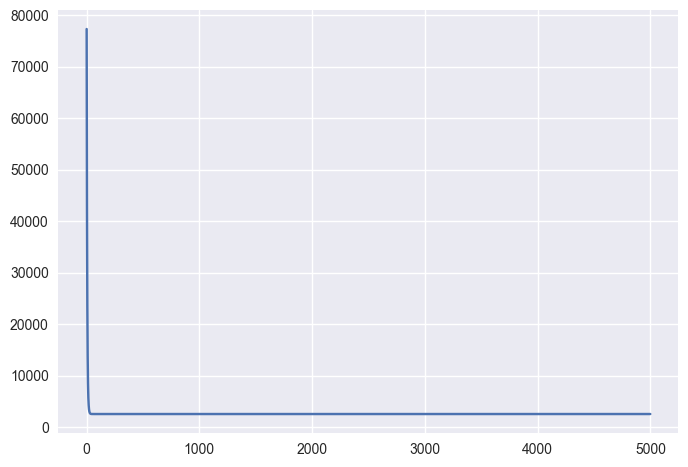

In [183]:
plt.plot(loss)

In [184]:
r1=r2_score(y2,y_pred)
print(r1,m1,b1)

0.8335613390956468 [-113.14919758] [282.70820513]


## dataset 3: p>1500

In [185]:
x3=np.array(p3_3).reshape(-1,1)
y3=np.array(p3).reshape(-1,1)

In [186]:

print(x3.shape,y3.shape)

(81, 1) (81, 1)


In [187]:
u=x3.mean(axis=0)
std=x3.std(axis=0)
x3=(x3-u)/std


In [188]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x3,y3)

LinearRegression()

In [189]:
y_pred=model.predict(x3)
y_pred.shape

(81, 1)

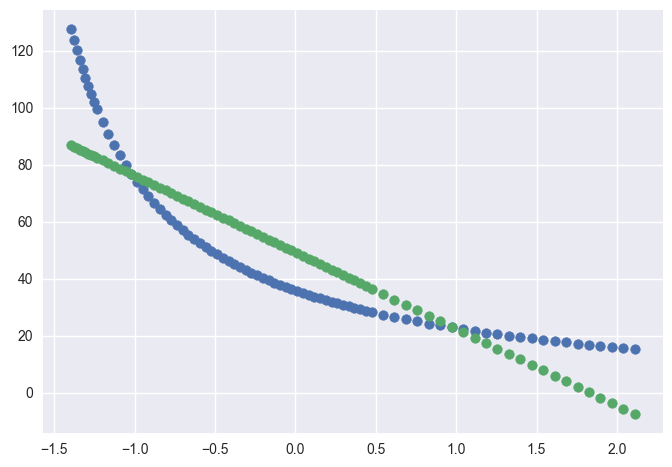

In [190]:
plt.scatter(x3,y3)
plt.scatter(x3,y_pred)

In [191]:
r1=r2_score(y3,y_pred)
print(r1,model.coef_,model.intercept_)

0.7683587450628104 [[-26.87471568]] [49.20474074]


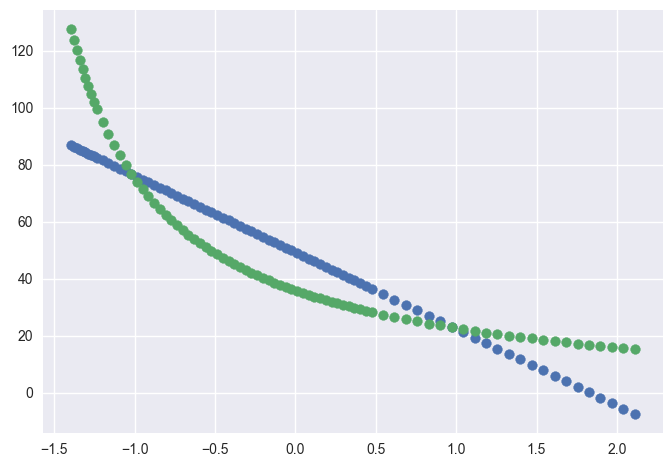

In [192]:
(m1,b1,loss)=linear_regression(x3,y3)
y_pred=hypothesis(m1,b1,x3)
#plt.scatter(x2,y2,c='red')
plt.scatter(x3,y_pred)
plt.scatter(x3,y3)

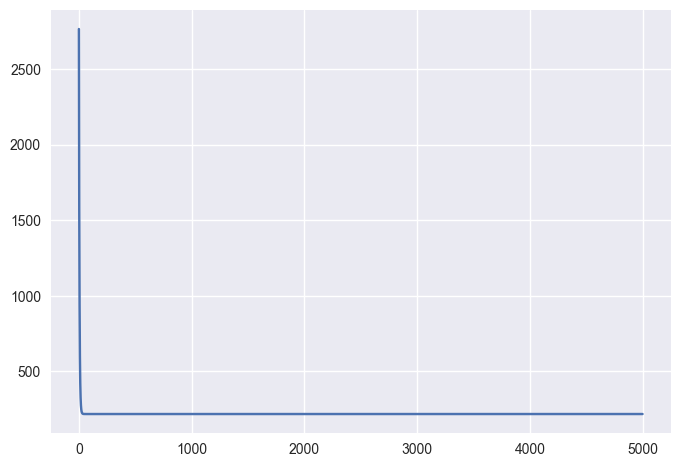

In [193]:
plt.plot(loss)

In [194]:
r1=r2_score(y3,y_pred)
print(r1,m1,b1)

0.7683587450628104 [-26.87471568] [49.20474074]


###### results are almost same from sklearn and linear regression from scratch after normalization of data

###### otherwise we have some unusual values without normalization due high deviation of data